# Rate based analysis of ring network

We have a network of $N$ excitatory neurons arranged in a ring - each has internal voltage $v$ which gives rise to a firing rate $r$ based on the firing rate curve 

$$\phi_E(v) = \rho_E \Theta(v - \theta_E)$$

Where $\rho_E$ is the response gradient, $\Theta$ is the Heaviside function, and $\theta_E$ is a threshold voltage under which the neuron never fires.

The network also has inhibitory neurons which are assumed to act on a much faster timescale than the excitatory neurons and hence have no internal variable. Their response is based on the instantaneous mean excitatory population neuron voltage (should this be output??)

$$I = \phi_I(\bar v) = \rho_I \Theta(\bar v - \theta_I)$$

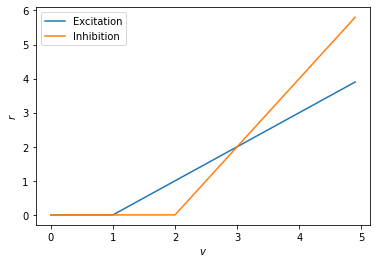

In [1]:
import matplotlib.pyplot as plt
import numpy as np

rho_E = 1
theta_E = 1
rho_I = 2
theta_I = 2

heaviside = lambda x: np.maximum(0,x)
phi_E = lambda v: rho_E * heaviside(v - theta_E)
phi_I = lambda v: rho_I*heaviside(v - theta_I)

v = np.arange(0,5,0.1)
plt.plot(v, phi_E(v), label='Excitation')
plt.plot(v, phi_I(v), label='Inhibition')
plt.legend()
plt.xlabel('$v$')
plt.ylabel('$r$')
plt.show()

The excitatory neurons are of the leaky integrate and fire (LIF) type, with the following update equation

$$\dot v_i = -v_i + \sum_j w_{ji} \phi_E(v_j) - \phi_I(\bar v)$$

Collecting all update equations into matrix form

$$\dot v = -v + W\phi_E(v) - \phi_I(\bar v)$$

The neuron population is arranged around a ring, so we suppose that connection weights are circularly symmetric around this ring, just depending on the circular distance between two neurons. The weight matrix, $W$, is therefore circulant, completely specified by its first row, $w$. We can therefore express the matrix multiplication as a convolution with the activity profile, $v$.

$$\dot v = -v + w \ast \phi_E(v) - \phi_I(\bar v)$$

To find the steady states of the system:

$$\begin{align*}
	\dot v &= 0 \\
	\therefore v &= w \ast \phi_E(v) - \phi_I(\bar v)
\end{align*}$$

Since $I$ is constant for all neurons in the network (global inhibition), to find stable solutions we are looking for pairs of $(v,w)$ such that $w \ast \phi_E(v)$ is of the same form as $v$, with a constant offset

## Linear regime analysis

We assume that the network operates in the linear firing regime above the excitatory nonlinearity ($v_i \geq \theta_E \forall i$), so we can expand the neuron response function as follows

$$\dot v = -v + W\rho_E(v - \theta_E) - \phi_I(\bar v)$$

One possible solution is for $w$ and $v$ to both be sinusoid functions of the same frequency. The convolution of the two will then be a sinusoid of the same frequency. We assume that the weights have 0 phase offset so that the phase of $v$ will be preserved, and therefore disregard the phase of $v$ because of the symmetrical nature of the network.

Assuming the following forms for $v$ and $w$

$$\begin{align*}
	v &= \bar v + A \cos(2\pi t / N) \\
	w &= \bar w + B \cos(2\pi t / N) \\
\end{align*}$$

The steady state activity is therefore at

$$\begin{align*}
	\dot v &= -v + w \ast \rho_E(v - \theta_E) - \phi_I(\bar v) \\
	&= -v + \left[\bar w + B \cos(2\pi t / N)\right] \ast \left[\rho_E(\bar v + A \cos(2\pi t / N) - \theta_E)\right] - \phi_I(\bar v) \\
	&= -v + \bar w \ast \rho_E(\bar v - \theta_E) + \bar w \ast \rho_E A \cos(2\pi t / N) 
	+ B \cos(2\pi t / N) \ast \rho_E(\bar v - \theta_E) + B \cos(2\pi t / N) \ast \rho_E A \cos(2\pi t / N) 
	- \phi_I(\bar v)
\end{align*}$$

Given that we are performing convolution over the period $[0,N)$:

$$\begin{align*}
	k_1 \ast k_2 &= k_1 k_2 N \\
	k \ast \cos(2\pi t/N) &= 0 \\
	A \cos(2\pi t/N) \ast B\cos(2\pi t/N) &= \frac{ABN}{2} \cos(2\pi t/N)
\end{align*}$$

Therefore

$$\begin{align*}
	v &= -v + N \bar w \rho_E(\bar v - \theta_E) + \frac{ABN \rho_E}{2} \cos(2\pi t / N) - \phi_I(\bar v) \\
	&= \left[- A + \frac{ABN \rho_E}{2}\right] \cos(2\pi t / N) + \left[-\bar v + N \bar w \rho_E(\bar v - \theta_E) - \phi_I(\bar v)\right]
\end{align*}$$

We can decompose this into a cosine amplitude term and a term for the mean

$$\begin{aligned}
	\dot A &= - A + \frac{ABN \rho_E}{2} \\
	\dot{\bar v} &= -\bar v + N \bar w \rho_E(\bar v - \theta_E) - \phi_I(\bar v)
\end{aligned}$$

For the cosine amplitude to be stable:

$$\begin{aligned}
	0 &= A\left(\frac{BN\rho_E}{2} - 1\right) \\
	B &= \frac{2}{N\rho_E}
\end{aligned}$$

This relation is unconstrained by the amplitude of the cosine wave itself, so choosing the amplitude of the weights' cosine term as above will make sinusoids of any amplitude stable (so long as the activity remains in the linear regime). We instead desire that only a particular amplitude cosine wave of activity be stable, so investigate the linear regime.

This regime occurs when some $v_i < \theta_E$, or equivalently, $\bar v - A < \theta_E$, $A > \bar v - \theta_E$. If we set $B$ greater than the stable value, $\dot A > 0$ and $A$ will grow until reaching the nonlinear regime.

$$B = \frac{2}{N\rho_E} + \delta_B$$

## Nonlinear regime analysis

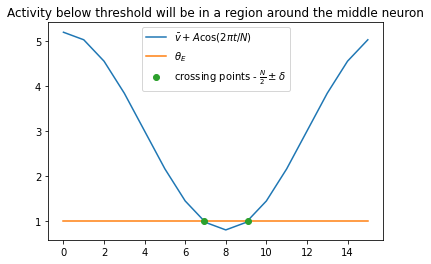

In [2]:
A = 2.2
theta_E = 1
v_mean = 3
N = 16
t = np.arange(0,N)

delta = N/(2*np.pi) * np.arccos((v_mean - theta_E)/A)

plt.plot(t, v_mean + A*np.cos(2*np.pi*t/N), label=r'$\bar v + A\cos(2\pi t /N)$')
plt.plot([t[0],t[-1]], [theta_E,theta_E], label=r'$\theta_E$')
plt.plot([N/2 - delta, N/2 + delta], v_mean + A*np.cos(2*np.pi*np.array([N/2 - delta, N/2 + delta])/N), 'o', label=r'crossing points - $\frac{N}{2} \pm \delta$')
plt.legend()
plt.title('Activity below threshold will be in a region around the middle neuron')
plt.show()

If the network activity isn't entirely above the threshold, then there will be a nonlinear response, which we can express as an additive term in addition to the linear response

$$\begin{aligned}
	\phi(v_i) &= \rho_E \max(0,v_i-\theta_E) \\
	&= \begin{cases}
		\rho_E (v_i - \theta_E) & v_i \geq \theta_E \\
		\rho_E (v_i - \theta_E) + \rho_E (\theta_E - v_i) & v_i < \theta_E
	\end{cases} \\
	\therefore \phi(v) &= \rho_E (v-\theta_E) + \rho_E (\theta_E - v_j) ~\forall j:v_j < \theta_E \\
\end{aligned}$$

$v$ has the form of a cosine, so the region where it is below $\theta_E$ will be about the midpoint of the period:

$$\begin{aligned}
	v &= \bar v + A \cos(2\pi t / N) \\
	\therefore \phi(v) &= \rho_E (v-\theta_E) + \rho_E (\theta_E - v) |_{\frac{N}{2}-\delta}^{\frac{N}{2}+\delta}
\end{aligned}$$

Where $\delta$ is half the width of the region below the threshold:

$$\begin{aligned}
	\theta_E &= \bar v + A \cos(2\pi (\frac{N}{2}-\delta) / N) \\
	\cos(2\pi (\frac{N}{2}-\delta) / N) &= \frac{\theta_E - \bar v}{A} \\
	2\pi \delta/N &= \arccos\left(\frac{\bar v - \theta_E}{A}\right) \\
	\therefore \delta &= \frac{N}{2\pi} \arccos\left(\frac{\bar v - \theta_E}{A}\right)
\end{aligned}$$

Just considering the extra term



$$\begin{align*}
	v^\prime &= \theta_E - \bar v - A \cos(2\pi t / N + \psi_v) |_{\frac{N}{2}-\delta}^{\frac{N}{2}+\delta}\\
	w &= \bar w + B \cos(2\pi t / N) \\
\end{align*}$$

Convolving it with the weights: (because the functions are symmetrical, we swap the order of convolution to enforce the limits)

$$\begin{align*}
	\rho_E(\theta_E - \bar v - A \cos(2\pi t / N) |_{\frac{N}{2}-\delta}^{\frac{N}{2}+\delta}) \ast (\bar w + B \cos(2\pi t / N)) 
	&= \rho_E \int_{\frac{N}{2}-\delta}^{\frac{N}{2}+\delta} (\theta_E - \bar v - A \cos(2\pi \tau / N)) (\bar w + B \cos(2\pi (t-\tau) / N)) ~\text{d}\tau \\
	&= \rho_E \int_{\frac{N}{2}-\delta}^{\frac{N}{2}+\delta} (\theta_E - \bar v) \bar w ~\text{d}\tau\\
	&~+\rho_E \int_{\frac{N}{2}-\delta}^{\frac{N}{2}+\delta} (\theta_E - \bar v) B \cos(2\pi (t-\tau) / N)~\text{d}\tau\\
	&~+\rho_E \int_{\frac{N}{2}-\delta}^{\frac{N}{2}+\delta} -A \cos(2\pi \tau / N) \bar w~\text{d}\tau\\
	&~+\rho_E \int_{\frac{N}{2}-\delta}^{\frac{N}{2}+\delta} -A \cos(2\pi \tau / N) B \cos(2\pi (t-\tau) / N)~\text{d}\tau\\
\end{align*}$$

Going through each term separately

$$\begin{aligned}
	\rho_E \int_{\frac{N}{2}-\delta}^{\frac{N}{2}+\delta} (\theta_E - \bar v) \bar w ~\text{d}\tau &= 
	\rho_E(\theta_E - \bar v) \bar w (\frac{N}{2}+\delta - (\frac{N}{2}-\delta)) \\
	&= 2\rho_E\bar w\delta(\theta_E - \bar v) \\
	\rho_E \int_{\frac{N}{2}-\delta}^{\frac{N}{2}+\delta} (\theta_E - \bar v) B \cos(2\pi (t-\tau) / N)~\text{d}\tau &= 
	\rho_E B (\theta_E - \bar v) \int_{\frac{N}{2}-\delta}^{\frac{N}{2}+\delta} \cos(2\pi t / N)\cos(2\pi \tau / N) + \sin(2\pi t / N)\sin(2\pi \tau / N)~\text{d}\tau \\
	&= \rho_E B (\theta_E - \bar v) \left[\cos(2\pi t / N)\int_{\frac{N}{2}-\delta}^{\frac{N}{2}+\delta}\cos(2\pi \tau / N) ~\text{d}\tau
	+ \sin(2\pi t / N)\int_{\frac{N}{2}-\delta}^{\frac{N}{2}+\delta} \sin(2\pi \tau / N)~\text{d}\tau\right] \\
	&= \rho_E B (\theta_E - \bar v) \left[\cos(2\pi t / N)\left[\frac{N}{2\pi}\sin(2\pi \tau / N)\right]_{\frac{N}{2}-\delta}^{\frac{N}{2}+\delta}
	+ \sin(2\pi t / N)\left[\frac{-N}{2\pi}\cos(2\pi \tau / N)\right]_{\frac{N}{2}-\delta}^{\frac{N}{2}+\delta} \right] \\
	&= \rho_E B (\theta_E - \bar v) \left[\frac{N}{2\pi}\cos(2\pi t / N)\left[ 2\cos(2\pi \frac{N}{2} / N)\sin(2\pi \delta / N) \right]
	+ \frac{N}{2\pi}\sin(2\pi t / N)\left[ 2\sin(2\pi \frac{N}{2} / N)\sin(2\pi \delta / N) \right] \right] \\
	&= \rho_E B (\theta_E - \bar v) \frac{N}{2\pi}\cos(2\pi t / N) \cdot -2\sin(2\pi \delta / N) \\
	&= -\frac{\rho_E BN}{\pi} (\theta_E - \bar v) \sin(2\pi \delta / N)\cos(2\pi t / N) \\
	\rho_E \int_{\frac{N}{2}-\delta}^{\frac{N}{2}+\delta} -A \cos(2\pi \tau / N) \bar w~\text{d}\tau &= 
	-\rho_E A \bar w \left[\frac{N}{2\pi}\sin(2\pi \tau / N)\right]_{\frac{N}{2}-\delta}^{\frac{N}{2}+\delta} \\
	&= \frac{-\rho_E A \bar w N}{2\pi} \left[ 2\cos(2\pi \frac{N}{2} / N)\sin(2\pi \delta / N) \right] \\
	&= \frac{\rho_E A \bar w N}{\pi} \sin(2\pi \delta / N) \\
	\rho_E \int_{\frac{N}{2}-\delta}^{\frac{N}{2}+\delta} -A \cos(2\pi \tau / N) B \cos(2\pi (t-\tau) / N)~\text{d}\tau &= \dots \\
	&= \frac{-\rho_E ABN}{4\pi} (4\pi\delta/N + \sin(4\pi\delta/N)) \cos(2\pi t/N)
\end{aligned}$$

Combining all partial results with the previous result, we get

$$\begin{aligned}
	w \ast \phi_E(v) &= \begin{cases}
		\frac{\rho_E ABN}{2}\cos(2\pi t/N) + \rho_E N \bar w (\bar v - \theta_E) & \bar v - A \geq \theta_E \\
		\left[\frac{\rho_E ABN}{2} -\frac{\rho_E BN}{\pi} (\theta_E - \bar v) \sin(2\pi \delta / N) + \frac{-\rho_E ABN}{4\pi} (4\pi\delta/N + \sin(4\pi\delta/N)) \right]\cos(2\pi t/N) + \left[\rho_E N \bar w (\bar v - \theta_E) + 2\rho_E\bar w\delta(\theta_E - \bar v) + \frac{\rho_E A \bar w N}{\pi} \sin(2\pi \delta / N)\right] & \bar v - A < \theta_E
	\end{cases}
\end{aligned}$$

Using this to calculate the derivative of the activity

$$\begin{aligned}
	\dot v &= -v + w \ast \phi_E(v) - \phi_I(\bar v) \\
	&= \begin{cases}
		-v + \frac{\rho_E ABN}{2}\cos(2\pi t/N) + \rho_E N \bar w (\bar v - \theta_E) - \phi_I(\bar v) & \bar v - A \geq \theta_E \\
		\left[-A + \frac{\rho_E ABN}{2} -\frac{\rho_E BN}{\pi} (\theta_E - \bar v) \sin(2\pi \delta / N) + \frac{-\rho_E ABN}{4\pi} (4\pi\delta/N + \sin(4\pi\delta/N)) \right]\cos(2\pi t/N) + \left[-\bar v + \rho_E N \bar w (\bar v - \theta_E) + 2\rho_E\bar w\delta(\theta_E - \bar v) + \frac{\rho_E A \bar w N}{\pi} \sin(2\pi \delta / N) - \phi_I(\bar v)\right] & \bar v - A < \theta_E
	\end{cases}
\end{aligned}$$

The derivative can be split into a term acting on the amplitude of the cosine wave, and a term acting on the constant offset

$$\begin{aligned}
	\dot A &= \begin{cases}
		-A + \frac{\rho_E ABN}{2} & \bar v - A \geq \theta_E \\
		-A + \frac{\rho_E ABN}{2} -\frac{\rho_E BN}{\pi} (\theta_E - \bar v) \sin(2\pi \delta / N) + \frac{-\rho_E ABN}{4\pi} (4\pi\delta/N + \sin(4\pi\delta/N)) & \bar v - A < \theta_E
	\end{cases} \\
	\dot{\bar v} &= \begin{cases}
		-\bar v + \rho_E N \bar w (\bar v - \theta_E) - \phi_I(\bar v) & \bar v - A \geq \theta_E \\
		-\bar v + \rho_E N \bar w (\bar v - \theta_E) + 2\rho_E\bar w\delta(\theta_E - \bar v) + \frac{\rho_E A \bar w N}{\pi} \sin(2\pi \delta / N) - \phi_I(\bar v) & \bar v - A < \theta_E
	\end{cases}
\end{aligned}$$

Using the small angle approximation for $\delta$ (assuming the part of the activity below the threshold is small)

$$\begin{aligned}
	\dot A &= \begin{cases}
		-A + \frac{\rho_E ABN}{2} & \bar v - A \geq \theta_E \\
		-A + \frac{\rho_E ABN}{2} -\frac{\rho_E BN}{\pi} (\theta_E - \bar v) \cdot 2\pi \delta / N + \frac{-\rho_E ABN}{4\pi} \cdot 8\pi\delta/N& \bar v - A < \theta_E
	\end{cases} \\
	&= \begin{cases}
		-A + \frac{\rho_E ABN}{2} & \bar v - A \geq \theta_E \\
		-A + \frac{\rho_E ABN}{2} -2\rho_E\delta B (\theta_E - \bar v) -2\rho_E AB\delta & \bar v - A < \theta_E
	\end{cases} \\
	\dot{\bar v} &= \begin{cases}
		-\bar v + \rho_E N \bar w (\bar v - \theta_E) - \phi_I(\bar v) & \bar v - A \geq \theta_E \\
		-\bar v + \rho_E N \bar w (\bar v - \theta_E) + 2\rho_E\bar w\delta(\theta_E - \bar v) + \frac{\rho_E A \bar w N}{\pi} \cdot 2\pi \delta / N - \phi_I(\bar v) & \bar v - A < \theta_E
	\end{cases} \\
	&= \begin{cases}
		-\bar v + \rho_E N \bar w (\bar v - \theta_E) - \phi_I(\bar v) & \bar v - A \geq \theta_E \\
		-\bar v + \rho_E N \bar w (\bar v - \theta_E) + 2\rho_E\bar w\delta(\theta_E - \bar v) + 2\rho_E A \bar w \delta - \phi_I(\bar v) & \bar v - A < \theta_E
	\end{cases}
\end{aligned}$$

For stability, $\dot A$ and $\dot{\bar v}$ should be $0$ in the nonlinear regime

$$\begin{aligned}
	0 &= -A + \frac{\rho_E ABN}{2} -2\rho_E\delta B (\theta_E - \bar v) -2\rho_E AB\delta \\
	0 &= -\bar v + \rho_E N \bar w (\bar v - \theta_E) + 2\rho_E\bar w\delta(\theta_E - \bar v) + 2\rho_E A \bar w \delta - \phi_I(\bar v)
\end{aligned}$$

Recalling the definition of $\delta$, and applying the small angle approximation again

$$\begin{aligned}
	\cos(2\pi \delta / N) &= \frac{\bar v - \theta_E}{A} \\
	1 - \frac{(2\pi \delta / N)^2}{2} &= \frac{\bar v - \theta_E}{A} \\
	\delta^2 &= \frac{N^2}{2\pi^2} \left(1 - \frac{\bar v - \theta_E}{A}\right) \\
	&= \frac{N^2}{2\pi^2 A} \left(A - (\bar v - \theta_E)\right)
\end{aligned}$$

Now, working on the first equation

$$\begin{aligned}
	0 &= -A + \frac{\rho_E ABN}{2} -2\rho_E\delta B (\theta_E - \bar v) -2\rho_E AB\delta \\
	A \left(1 - \frac{\rho_E BN}{2}\right) &= -2\rho_E B\delta ((\theta_E - \bar v) + A) \\
	A \left(\frac{\rho_E BN}{2} - 1\right) &= 2\rho_E B\delta (A - (\bar v - \theta_E)) \\
	A^2 \left(\frac{\rho_E BN}{2} - 1\right)^2 &= 4\rho_E^2 B^2\delta^2 (A - (\bar v - \theta_E))^2 \\
	\frac{A^2}{4\rho_E^2 B^2} \left(\frac{\rho_E BN}{2} - 1\right)^2 &= \frac{N^2}{2\pi^2 A} (A - (\bar v - \theta_E))^3 \\
	\frac{A^3 \pi^2}{2\rho_E^2 B^2 N^2} \left(\frac{\rho_E BN}{2} - 1\right)^2 &= (A - (\bar v - \theta_E))^3 \\
	A \left(\frac{\pi}{\sqrt{2}\rho_E B N}\left(\frac{\rho_E BN}{2} - 1\right)\right)^{2/3} &= A - (\bar v - \theta_E) \\
	\bar v &= \left(1 - \left(\frac{\pi}{\sqrt{2} N}\left(\frac{N}{2} - \frac{1}{\rho_E B}\right)\right)^{2/3}\right)A + \theta_E
\end{aligned}$$

Now, working on the second equation

$$\begin{aligned}
	0 &= -\bar v + \rho_E N \bar w (\bar v - \theta_E) + 2\rho_E\bar w\delta(\theta_E - \bar v) + 2\rho_E A \bar w \delta - \phi_I(\bar v) \\
	\bar v - \rho_E N \bar w (\bar v - \theta_E) + \phi_I(\bar v) &= 2\rho_E\bar w\delta(A - (\bar v - \theta_E)) \\
	\left(\bar v - \rho_E N \bar w (\bar v - \theta_E) + \phi_I(\bar v)\right)^2 &= 4\rho_E^2\bar w^2\delta^2(A - (\bar v - \theta_E))^2 \\
	\left(\frac{1}{2\rho_E\bar w}(\bar v - \rho_E N \bar w (\bar v - \theta_E) + \phi_I(\bar v))\right)^2 &= \frac{N^2}{2\pi^2 A}(A - (\bar v - \theta_E))^3 \\
\end{aligned}$$

From above, we can substitute in for $(A - (\bar v - \theta_E))^3$

$$\begin{aligned}
	\left(\frac{1}{2\rho_E\bar w}(\bar v - \rho_E N \bar w (\bar v - \theta_E) + \phi_I(\bar v))\right)^2 &= \frac{N^2}{2\pi^2 A} \frac{A^3 \pi^2}{2\rho_E^2 B^2 N^2} \left(\frac{\rho_E BN}{2} - 1\right)^2 \\
	\left(\frac{1}{2\rho_E\bar w}(\bar v - \rho_E N \bar w (\bar v - \theta_E) + \phi_I(\bar v))\right)^2 &= \frac{A^2}{4\rho_E^2 B^2} \left(\frac{\rho_E BN}{2} - 1\right)^2 \\
	\frac{1}{2\rho_E\bar w}(\bar v - \rho_E N \bar w (\bar v - \theta_E) + \phi_I(\bar v)) &= \frac{A}{2\rho_E B} \left(\frac{\rho_E BN}{2} - 1\right) \\
	\frac{\bar v}{2\rho_E} + \frac{\phi_I(\bar v)}{2\rho_E} &= \bar w \left(\frac{1}{2} N (\bar v - \theta_E) + \frac{A}{2\rho_E B} \left(\frac{\rho_E BN}{2} - 1\right) \right) \\
	\bar v + \phi_I(\bar v) &= \bar w \left(\rho_E N (\bar v - \theta_E) + A \left(\frac{\rho_E N}{2} - \frac{1}{B}\right) \right) \\
	\bar w &= \frac{\bar v + \phi_I(\bar v)}{\rho_E N (\bar v - \theta_E) + A \left(\frac{\rho_E N}{2} - \frac{1}{B}\right)}
\end{aligned}$$

Therefore, given a desired amplitude for the stable cosine wave activity, $A$, the required network weights can be calculated as follows:

$$\begin{aligned}
	B &= \frac{2}{\rho_E N} + \delta_B \\
	\bar v &= \left(1 - \left(\frac{\pi}{\sqrt{2} N}\left(\frac{N}{2} - \frac{1}{\rho_E B}\right)\right)^{2/3}\right)A + \theta_E \\
	\bar w &= \frac{\bar v + \phi_I(\bar v)}{\rho_E N (\bar v - \theta_E) + A \left(\frac{\rho_E N}{2} - \frac{1}{B}\right)}
\end{aligned}$$

## Side note: Gaussian case

If we assume both the activity and weights are Gaussians, then the convolution of the two will be a Gaussian with variance equal to the sum of the activity and weight variances. This cannot then be of the same form as the original activity (except in the case that the weight variance is 0 - ie. a dirac delta identity matrix). Therefore, for Gaussian activity the weight matrix must be of a different form

## Testing the cosine case

In [3]:
# So let's say I want a v_amp of 2.5
#setup
N = 8
B = 2/N + 0.01
theta_E = 1
theta_I = 2
rho_E = 1
rho_I = 2
# target
A = 1.5

v_mean = A*(1 - (((np.pi/(np.sqrt(2)*N) * (N/2 - 1/(rho_E*B)))**2)**(1/3))) + theta_E
w_mean = (v_mean + rho_I*(v_mean-theta_I)) / (rho_E*N*(v_mean-theta_E) + A*(rho_E*N/2 - 1/B))

print(f'v_mean = {v_mean:.4f}, w_mean = {w_mean:.4f}')

v_mean = 2.3167, w_mean = 0.2741


In [4]:
cosine = lambda amp, T, phase: lambda x: amp*(np.cos(2*np.pi*(x - phase)/T))
relu = lambda x: np.maximum(0,x)
sigmoid_E = lambda x: rho_E*relu(x - theta_E)
sigmoid_I = lambda x: rho_I*relu(x - theta_I)
def circ_wrapped_distance(x:np.ndarray, wrapping_boundary:float=2*np.pi):
	return wrapping_boundary/2 - np.abs(np.abs(x) - wrapping_boundary/2)
	
fx = lambda x: cosine(A,N,0)(x) + v_mean
fw = lambda x: cosine(B,N,0)(x) + w_mean
t = np.arange(0,N,0.5)

d = circ_wrapped_distance(np.atleast_2d(t).T - t, N)
w = (t[1]-t[0]) * fw(d)

In [5]:
dt = 0.02
def simulate(v_init, num_timesteps: int):
	trajectory = np.zeros((num_timesteps,len(v_init)))
	trajectory[0] = v_init.copy()
	for i in range(1,num_timesteps):
		v = trajectory[i-1]
		v_dot = (-v + w@sigmoid_E(v) - sigmoid_I(v.mean()))*dt
		trajectory[i] = v + v_dot
		if abs(v_dot).sum() < 1e-7:
			trajectory[i:,:] = trajectory[i]
			break
	return trajectory

In [6]:
# get the flow field

v_mean_range = np.arange(0,3.6,0.1)
A_range = np.arange(0,3.6,0.1)

v_mean_dots = np.zeros((len(v_mean_range),len(A_range)))
A_dots = np.zeros((len(v_mean_range),len(A_range)))

for i,v_bar in enumerate(v_mean_range):
	for j, A in enumerate(A_range):
		if v_bar - A >= theta_E:
			A_dot = -A + rho_E*A*B/(2/N)
			v_bar_dot = -v_bar + rho_E*w_mean*N*(v_bar-theta_E) - rho_I*relu(v_bar - theta_I)
		else:
			delta = 1/(2*np.pi/N) * np.arccos((v_bar - theta_E) / A)
			A_dot = -A + rho_E*A*B/(2/N) + rho_E*B/(np.pi/N)*(v_bar-theta_E)*np.sin(2*np.pi/N*delta) - rho_E*A*B/(4*np.pi/N)*(4*np.pi/N*delta + np.sin(4*np.pi/N*delta))
			v_bar_dot = -v_bar + rho_E*w_mean*N*(v_bar-theta_E) - rho_I*relu(v_bar - theta_I) + 2*rho_E*delta*w_mean*(A - (v_bar-theta_E))
		v_mean_dots[i,j] = v_bar_dot
		A_dots[i,j] = A_dot

C:\Users\Dominic\AppData\Local\Temp\ipykernel_6564\1616978829.py:15: RuntimeWarning: divide by zero encountered in double_scalars
  delta = 1/(2*np.pi/N) * np.arccos((v_bar - theta_E) / A)
C:\Users\Dominic\AppData\Local\Temp\ipykernel_6564\1616978829.py:15: RuntimeWarning: invalid value encountered in arccos
  delta = 1/(2*np.pi/N) * np.arccos((v_bar - theta_E) / A)


v_mean = 2.3237, A = 1.5710


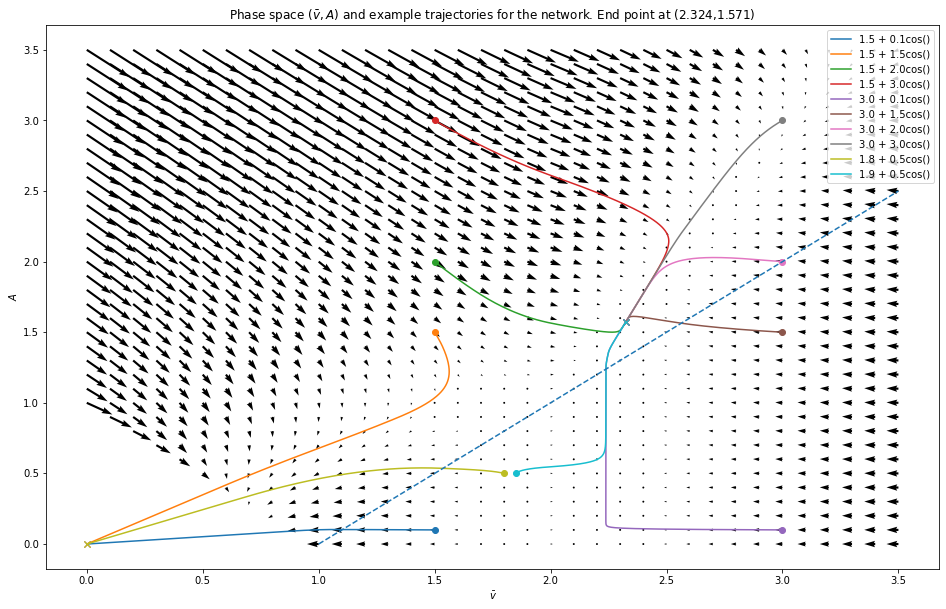

In [8]:
half_amplitude = lambda x: 0.5*(x.max() - x.min())

v_sample = [1.5 + 0.1*cosine(1, N, 4)(t), 1.5 + 1.5*cosine(1, N, 4)(t), 1.5 + 2*cosine(1, N, 4)(t), 1.5 + 3*cosine(1, N, 4)(t), 3 + 0.1*cosine(1, N, 4)(t), 3 + 1.5*cosine(1, N, 4)(t), 3 + 2*cosine(1, N, 4)(t), 3 + 3*cosine(1, N, 4)(t), 1.8 + 0.5*cosine(1, N, 4)(t), 1.85 + 0.5*cosine(1, N, 4)(t)]

plt.figure(figsize=(16,10))
plt.quiver(v_mean_range, A_range, v_mean_dots.T, A_dots.T)
plt.xlabel(r'$\bar v$')
plt.ylabel(r'$A$')

for i, v_in in enumerate(v_sample):
	trajectory = simulate(v_in, 20000)
	c = plt.rcParams['axes.prop_cycle'].by_key()['color'][i]
	plt.plot(np.mean(trajectory, axis=1), 0.5*abs(np.max(trajectory, axis=1) - np.min(trajectory, axis=1)), label=f'{v_in.mean():.1f} + {(v_in.max()-v_in.min())/2:.1f}cos()', color=c)
	plt.plot(np.mean(trajectory[0]), half_amplitude(trajectory[0]), 'o', color=c)
	plt.plot(np.mean(trajectory[-1]), half_amplitude(trajectory[-1]), 'x', color=c)

print(f'v_mean = {np.mean(x := simulate(v_sample[-1], 20000)[-1]):.4f}, A = {half_amplitude(x):.4f}')

plt.plot(v_mean_range[v_mean_range >= theta_E], v_mean_range[v_mean_range >= theta_E] - theta_E, '--')


plt.title(rf'Phase space ($\bar v, A$) and example trajectories for the network. End point at ({np.mean(x := simulate(v_sample[-1], 20000)[-1]):.3f},{half_amplitude(x):.3f})')
plt.legend()
plt.show()